In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [7]:
# CARGAR LOS DATOS 
print("🔄 CARGANDO DATASET...")
df = pd.read_csv('../data/raw/Worldwide Travel Cities Dataset (Ratings and Climate).csv')
print(f"✅ Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")

🔄 CARGANDO DATASET...
✅ Dataset cargado: 560 filas, 19 columnas


✅ Creada variable 'avg_activity_rating' desde 9 actividades
🚀 EJECUTANDO FASE 3...
🚀 INICIANDO ANÁLISIS EXPLORATORIO COMPLETO
📊 PASO 1: ANÁLISIS UNIVARIADO
📊 ANÁLISIS UNIVARIADO - CIUDADES TURÍSTICAS
📈 ANÁLISIS DE DISTRIBUCIONES NUMÉRICAS


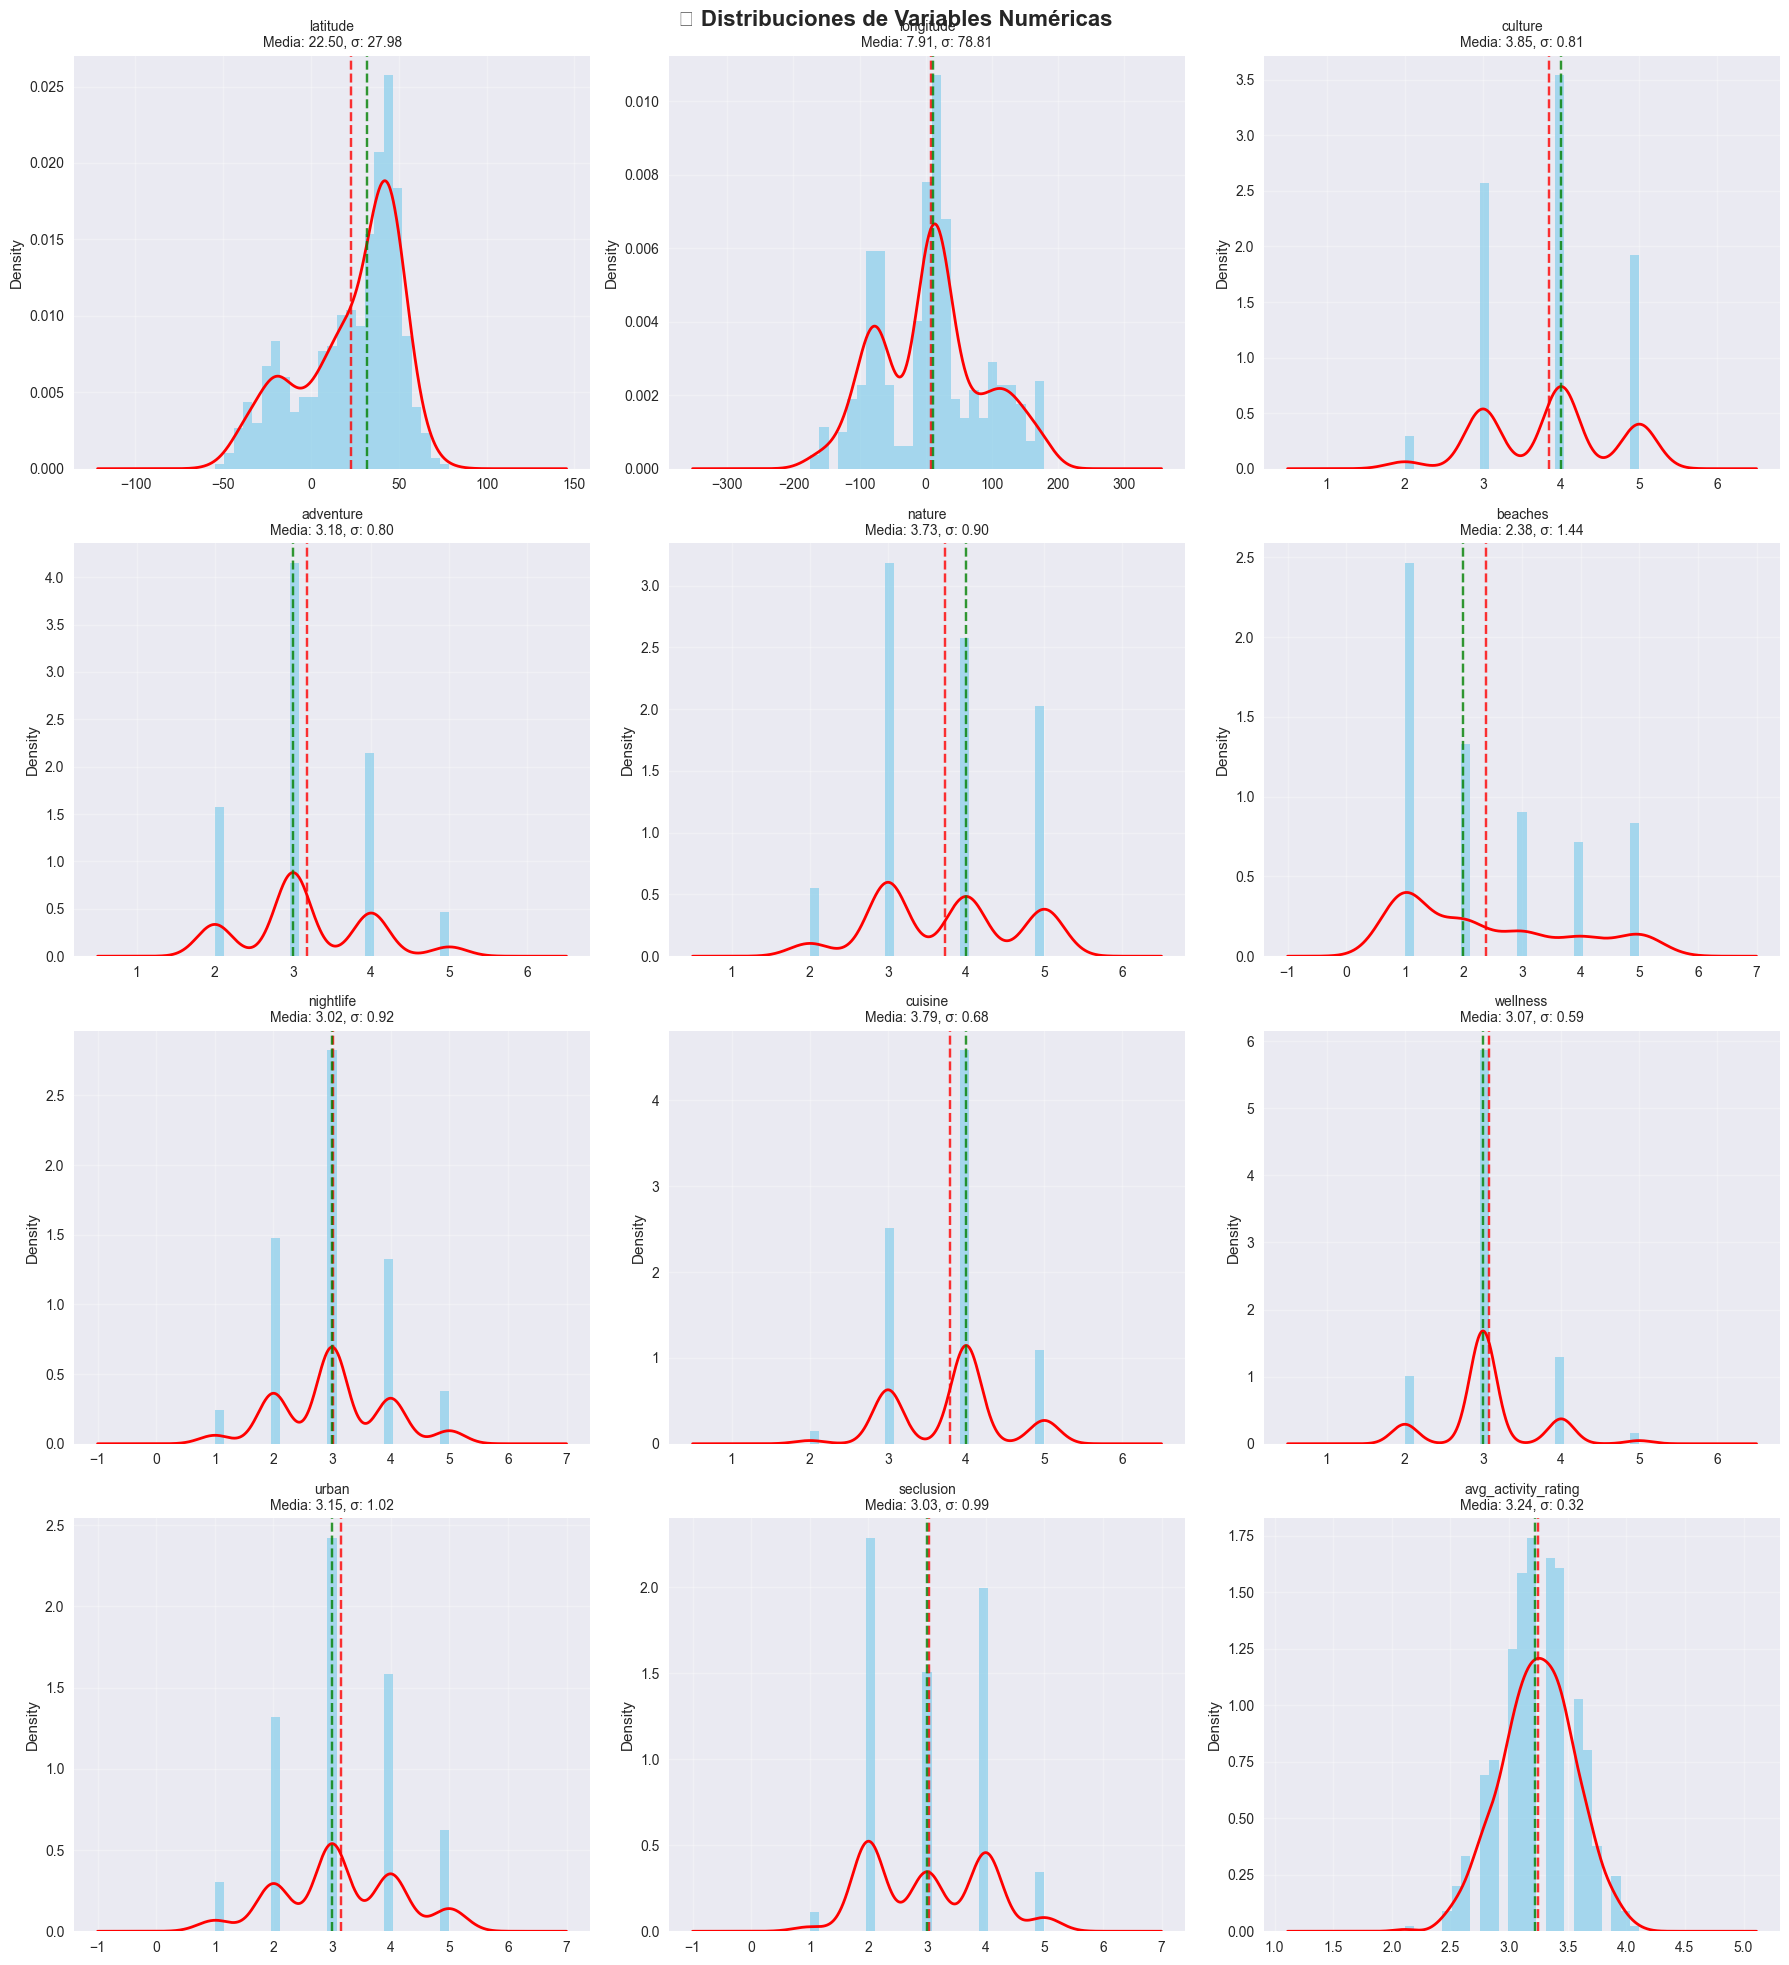


⭐ ANÁLISIS DE ACTIVIDADES TURÍSTICAS (9 categorías)


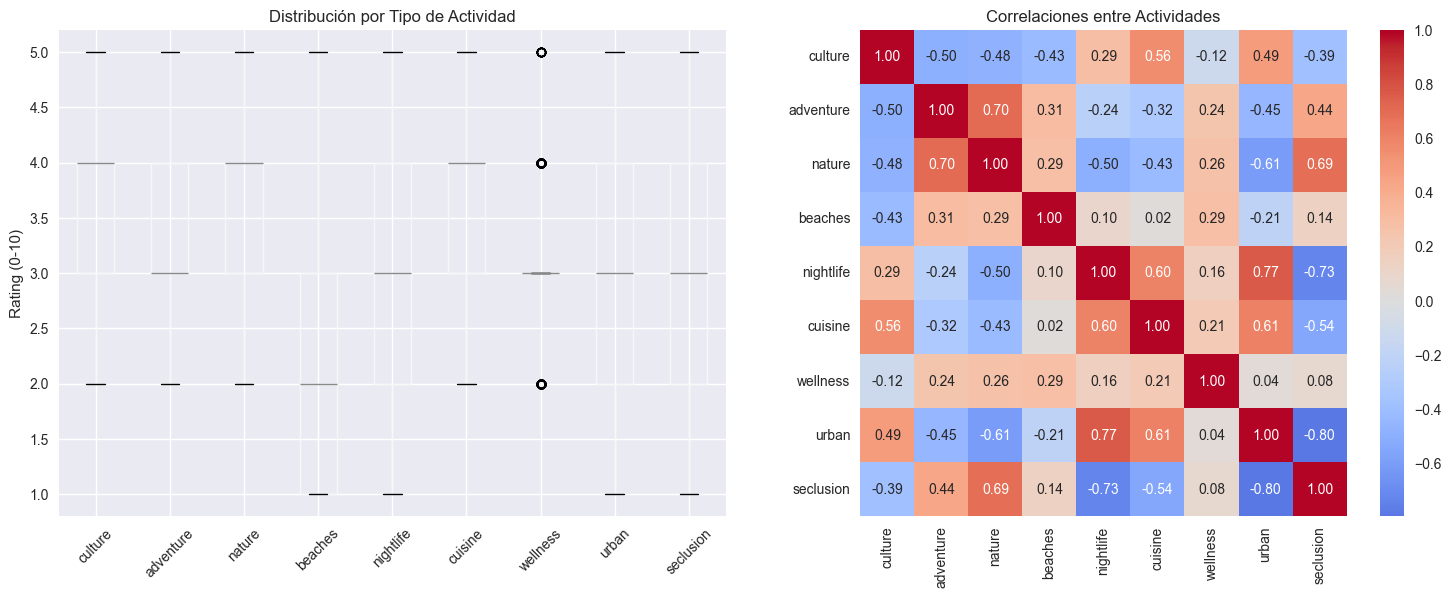

📊 Estadísticas por Actividad:
   • Culture: 3.85 ± 0.81
   • Adventure: 3.18 ± 0.80
   • Nature: 3.73 ± 0.90
   • Beaches: 2.38 ± 1.44
   • Nightlife: 3.02 ± 0.92
   • Cuisine: 3.79 ± 0.68
   • Wellness: 3.07 ± 0.59
   • Urban: 3.15 ± 1.02
   • Seclusion: 3.03 ± 0.99

🔗 PASO 2: ANÁLISIS BIVARIADO
🔗 ANÁLISIS BIVARIADO - RELACIONES TURÍSTICAS
📊 MATRIZ DE CORRELACIÓN


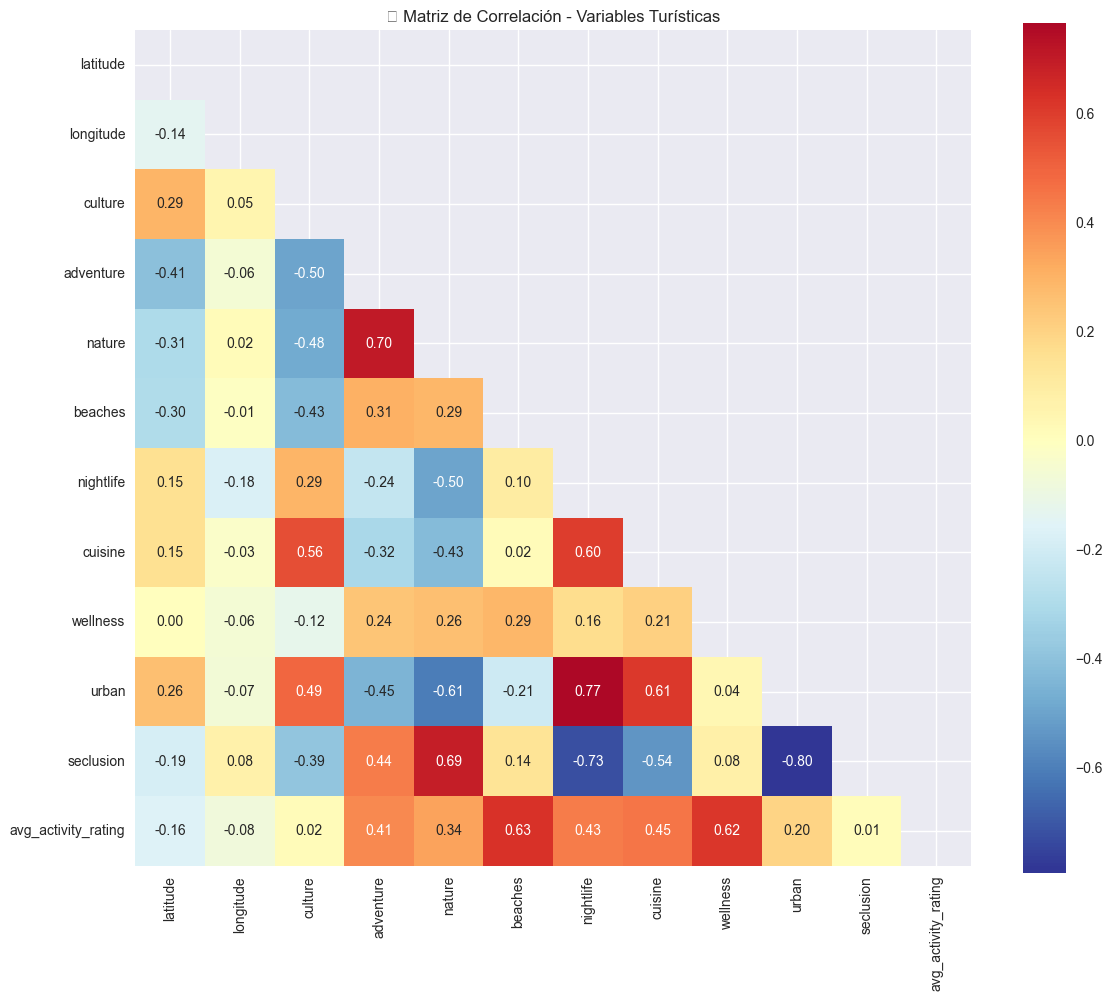


🔥 CORRELACIONES SIGNIFICATIVAS:
   🔸 latitude ↔ adventure: -0.410
   🔸 culture ↔ adventure: -0.499
   🔸 culture ↔ nature: -0.479
   🔸 culture ↔ beaches: -0.428
   🔸 culture ↔ cuisine: 0.556
   🔸 culture ↔ urban: 0.487
   🔥 adventure ↔ nature: 0.705
   🔸 adventure ↔ urban: -0.448
   🔸 adventure ↔ seclusion: 0.435
   🔸 adventure ↔ avg_activity_rating: 0.405
   🔸 nature ↔ nightlife: -0.498
   🔸 nature ↔ cuisine: -0.427
   🔥 nature ↔ urban: -0.608
   🔥 nature ↔ seclusion: 0.689
   🔥 beaches ↔ avg_activity_rating: 0.631
   🔥 nightlife ↔ cuisine: 0.601
   🔥 nightlife ↔ urban: 0.767
   🔥 nightlife ↔ seclusion: -0.726
   🔸 nightlife ↔ avg_activity_rating: 0.431
   🔥 cuisine ↔ urban: 0.613
   🔸 cuisine ↔ seclusion: -0.545
   🔸 cuisine ↔ avg_activity_rating: 0.452
   🔥 wellness ↔ avg_activity_rating: 0.618
   🔥 urban ↔ seclusion: -0.796


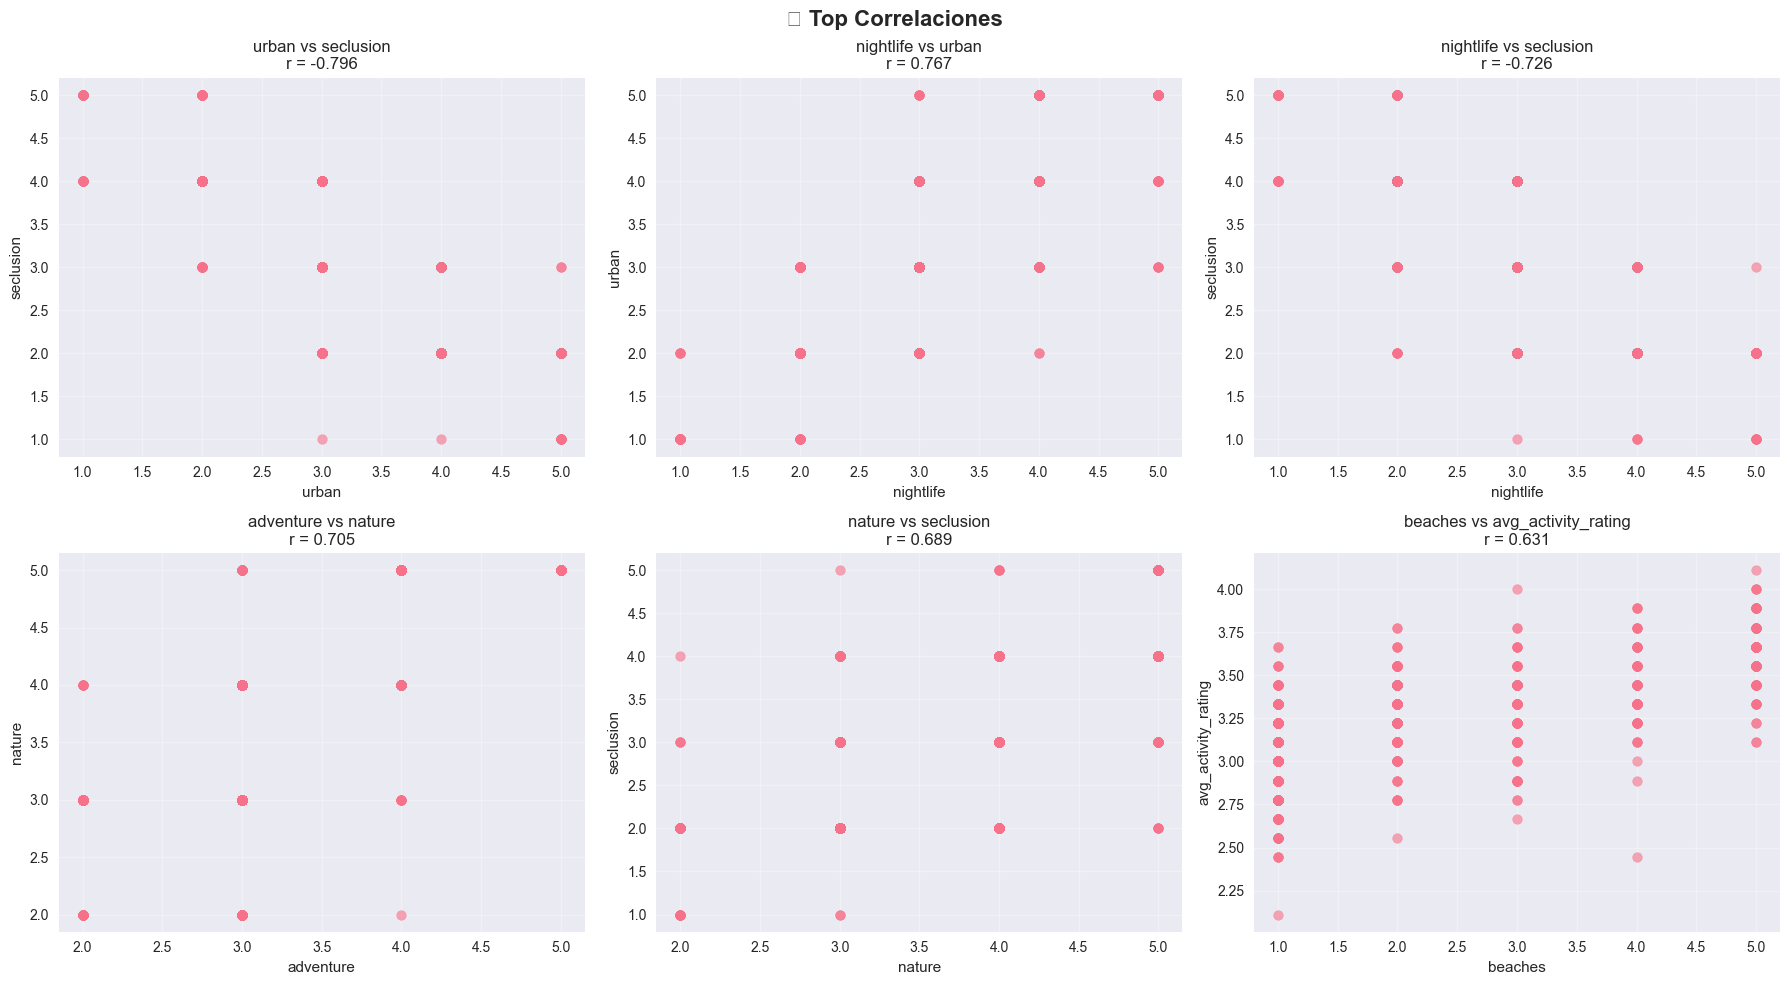


🌐 PASO 3: ANÁLISIS MULTIVARIADO
🌐 ANÁLISIS MULTIVARIADO - PATRONES COMPLEJOS
🗺️ ANÁLISIS POR REGIÓN


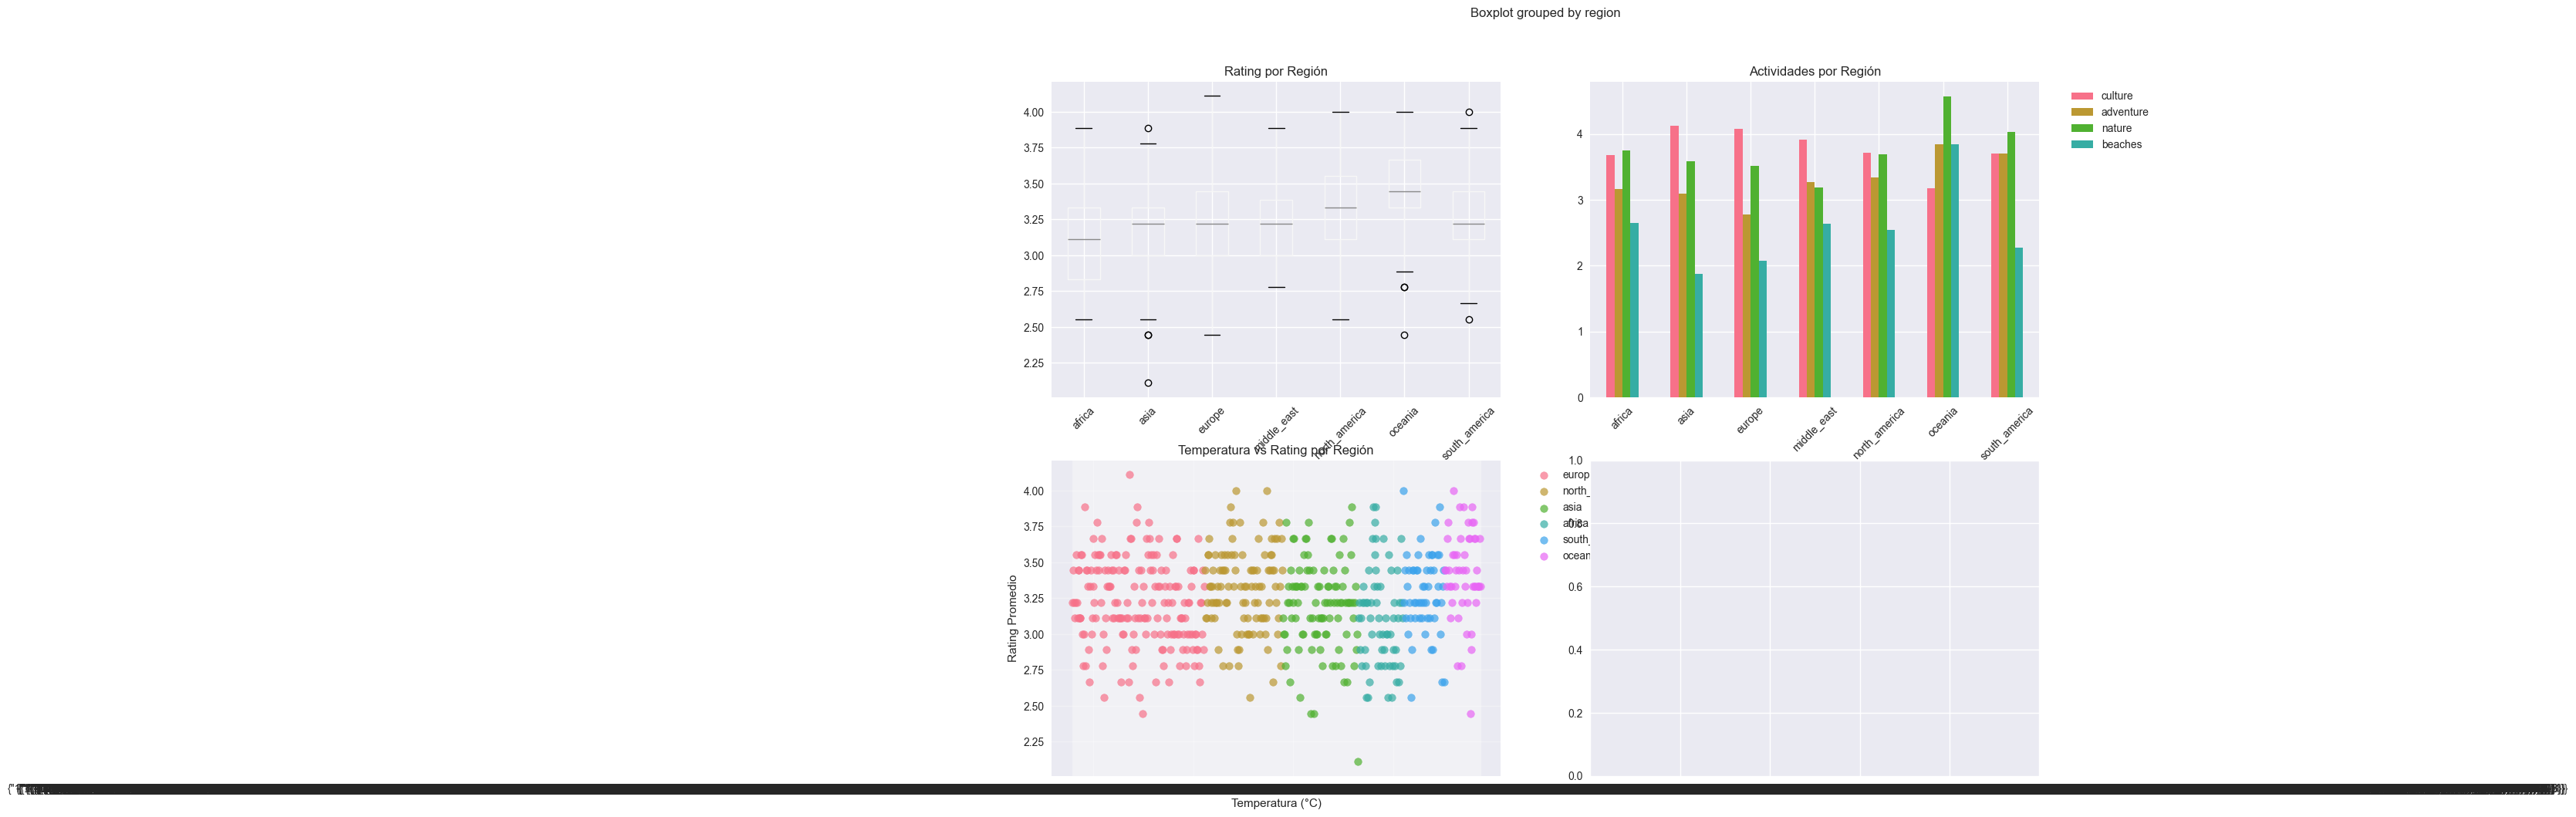


📊 Estadísticas por Región:
               count  mean   std
region                          
africa            63  3.11  0.34
asia              99  3.19  0.32
europe           177  3.22  0.30
middle_east       11  3.22  0.32
north_america    104  3.32  0.29
oceania           51  3.42  0.31
south_america     55  3.28  0.28

💡 PASO 4: EXTRACCIÓN DE INSIGHTS
💡 INSIGHTS Y PATRONES TURÍSTICOS CLAVE

🚀 HALLAZGOS PRINCIPALES:
   1. 🏆 Ciudad mejor valorada: Crete (4.11/10)
   2. 📉 Ciudad peor valorada: Naypyidaw (2.11/10)
   3. 📊 Rango de ratings: 2.00 puntos
   4. 🔗 Correlación más fuerte: urban y seclusion (negativa, r=-0.796)
   5. 🌍 Región mejor valorada: oceania (3.42)
   6. 🌏 Región con menor rating: africa (3.11)
   7. 🌡️ Temperatura sin correlación fuerte con rating (r=nan)
   8. 🗓️ Duración más común: ["Short trip","Weekend","One week"] (21.4% de destinos)
   9. 📅 Tipos de duración únicos: 21 categorías
   10. ⭐ Actividad mejor valorada: culture (3.85)
   11. 📊 Actividad menos valora

In [8]:
# Crear promedio de actividades si no existe
activity_columns = ['culture', 'adventure', 'nature', 'beaches', 'nightlife', 
                   'cuisine', 'wellness', 'urban', 'seclusion']
existing_activities = [col for col in activity_columns if col in df.columns]

if existing_activities and 'avg_activity_rating' not in df.columns:
    df['avg_activity_rating'] = df[existing_activities].mean(axis=1)
    df['avg_activity_rating'] = pd.to_numeric(df['avg_activity_rating'], errors='coerce')
    print(f"✅ Creada variable 'avg_activity_rating' desde {len(existing_activities)} actividades")

# ========================================
# 1. ANÁLISIS UNIVARIADO
# ========================================

def univariate_analysis_tourism(df):
    print("="*70)
    print("📊 ANÁLISIS UNIVARIADO - CIUDADES TURÍSTICAS")
    print("="*70)
    
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categoric_columns = df.select_dtypes(include=['object', 'category']).columns
    
    print("📈 ANÁLISIS DE DISTRIBUCIONES NUMÉRICAS")
    
    # Crear subplots para variables numéricas
    n_cols = 3
    n_rows = int(np.ceil(len(numeric_columns) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    fig.suptitle('📊 Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold')
    
    # Asegurar que axes sea siempre una matriz 2D
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(numeric_columns):
        row = i // n_cols
        col_idx = i % n_cols
        ax = axes[row, col_idx]
        
        # Histograma con curva de densidad
        df[col].hist(bins=25, alpha=0.7, ax=ax, density=True, color='skyblue')
        df[col].plot(kind='density', ax=ax, color='red', linewidth=2)
        
        # Estadísticas
        col_numeric = pd.to_numeric(df[col], errors='coerce')
        mean_val = col_numeric.mean()
        median_val = col_numeric.median()
        std_val = col_numeric.std()
        
        try:
            col_data = pd.to_numeric(df[col], errors='coerce').dropna()
            if len(col_data) > 0:
                skewness = stats.skew(col_data)
            else:
                skewness = 0.0
        except:
            skewness = 0.0
        
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8)
        ax.axvline(median_val, color='green', linestyle='--', alpha=0.8)
        
        ax.set_title(f'{col}\nMedia: {mean_val:.2f}, σ: {std_val:.2f}', fontsize=10)
        ax.grid(True, alpha=0.3)
    
    # Ocultar subplots vacíos
    for i in range(len(numeric_columns), n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de actividades
    if existing_activities:
        print(f"\n⭐ ANÁLISIS DE ACTIVIDADES TURÍSTICAS ({len(existing_activities)} categorías)")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Boxplot de actividades
        df[existing_activities].boxplot(ax=ax1)
        ax1.set_title('Distribución por Tipo de Actividad')
        ax1.set_ylabel('Rating (0-10)')
        ax1.tick_params(axis='x', rotation=45)
        
        # Heatmap de correlaciones
        corr_activities = df[existing_activities].corr()
        sns.heatmap(corr_activities, annot=True, cmap='coolwarm', center=0,
                   square=True, ax=ax2, fmt='.2f')
        ax2.set_title('Correlaciones entre Actividades')
        
        plt.tight_layout()
        plt.show()
           
        print("📊 Estadísticas por Actividad:")
        for col in existing_activities:
            col_numeric = pd.to_numeric(df[col], errors='coerce')
            mean_val = col_numeric.mean()
            std_val = col_numeric.std()
            print(f"   • {col.capitalize()}: {mean_val:.2f} ± {std_val:.2f}")

    return df.describe()

# ========================================
# 2. ANÁLISIS BIVARIADO
# ========================================

def bivariate_analysis_tourism(df):
    print("="*70)
    print("🔗 ANÁLISIS BIVARIADO - RELACIONES TURÍSTICAS")
    print("="*70)
    
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    # Matriz de correlación
    print("📊 MATRIZ DE CORRELACIÓN")
    matriz_corr = df[numeric_columns].corr()
    
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
    sns.heatmap(matriz_corr, mask=mask, annot=True, cmap='RdYlBu_r', 
                center=0, square=True, fmt='.2f')
    plt.title('🔗 Matriz de Correlación - Variables Turísticas')
    plt.tight_layout()
    plt.show()
    
    # Identificar correlaciones significativas
    print("\n🔥 CORRELACIONES SIGNIFICATIVAS:")
    strong_correlations = []
    
    for i in range(len(matriz_corr.columns)):
        for j in range(i+1, len(matriz_corr.columns)):
            corr_value = matriz_corr.iloc[i, j]
            var1 = matriz_corr.columns[i]
            var2 = matriz_corr.columns[j]
            
            if abs(corr_value) >= 0.6:
                strong_correlations.append((var1, var2, corr_value, 'Fuerte'))
                print(f"   🔥 {var1} ↔ {var2}: {corr_value:.3f}")
            elif abs(corr_value) >= 0.4:
                strong_correlations.append((var1, var2, corr_value, 'Moderada'))
                print(f"   🔸 {var1} ↔ {var2}: {corr_value:.3f}")
    
    # Visualizar top correlaciones
    if strong_correlations:
        strong_correlations_sorted = sorted(strong_correlations, 
                                            key=lambda x: abs(x[2]), reverse=True)
        
        n_plots = min(6, len(strong_correlations_sorted))
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('📈 Top Correlaciones', fontsize=16, fontweight='bold')
        axes = axes.flatten()
        
        for i in range(n_plots):
            var1, var2, corr, strength = strong_correlations_sorted[i]
            
            axes[i].scatter(df[var1], df[var2], alpha=0.6)
            axes[i].set_xlabel(var1)
            axes[i].set_ylabel(var2)
            axes[i].set_title(f'{var1} vs {var2}\nr = {corr:.3f}')
            axes[i].grid(True, alpha=0.3)
        
        # Ocultar plots vacíos
        for i in range(n_plots, 6):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    return matriz_corr, strong_correlations

# ========================================
# 3. ANÁLISIS MULTIVARIADO
# ========================================

def multivariate_analysis_tourism(df):
    print("="*70)
    print("🌐 ANÁLISIS MULTIVARIADO - PATRONES COMPLEJOS")
    print("="*70)
    
    # Análisis por región
    if 'region' in df.columns and 'avg_activity_rating' in df.columns:
        print("🗺️ ANÁLISIS POR REGIÓN")
        
        # Top 8 regiones por número de ciudades
        top_regions = df['region'].value_counts().head(8).index
        df_regions = df[df['region'].isin(top_regions)]
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🌍 Análisis por Región', fontsize=16, fontweight='bold')
        
        # Boxplot por región
        df_regions.boxplot(column='avg_activity_rating', by='region', ax=axes[0,0])
        axes[0,0].set_title('Rating por Región')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Promedio de actividades por región
        if len(existing_activities) > 3:
            region_means = df_regions.groupby('region')[existing_activities[:4]].mean()
            region_means.plot(kind='bar', ax=axes[0,1])
            axes[0,1].set_title('Actividades por Región')
            axes[0,1].tick_params(axis='x', rotation=45)
            axes[0,1].legend(bbox_to_anchor=(1.05, 1))
        
        # Scatter temperatura vs rating
        if 'avg_temp_monthly' in df.columns:
            for region in top_regions[:6]:
                region_data = df[df['region'] == region]
                axes[1,0].scatter(region_data['avg_temp_monthly'], 
                                region_data['avg_activity_rating'], 
                                label=region, alpha=0.7)
            
            axes[1,0].set_xlabel('Temperatura (°C)')
            axes[1,0].set_ylabel('Rating Promedio')
            axes[1,0].set_title('Temperatura vs Rating por Región')
            axes[1,0].legend(bbox_to_anchor=(1.05, 1))
            axes[1,0].grid(True, alpha=0.3)
        
        
        # Duración por región
        if 'ideal_durations' in df.columns:
            duration_by_region = []
            region_labels = []
    
            for region in top_regions[:6]:
                region_durations = df[df['region'] == region]['ideal_durations']
                 # Convertir a numérico y filtrar valores válidos
                region_durations_numeric = pd.to_numeric(region_durations, errors='coerce').dropna()
        
                if len(region_durations_numeric) > 0:
                    duration_by_region.append(region_durations_numeric)
                    region_labels.append(region[:10])
    
            if duration_by_region:
                axes[1,1].boxplot(duration_by_region, labels=region_labels)
                axes[1,1].set_title('Duración Ideal por Región')
                axes[1,1].set_ylabel('Días')
                axes[1,1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Estadísticas por región
        region_stats = df_regions.groupby('region')['avg_activity_rating'].agg([
            'count', 'mean', 'std']).round(2)
        print("\n📊 Estadísticas por Región:")
        print(region_stats)
    
    return True

# ========================================
# 4. EXTRACCIÓN DE INSIGHTS
# ========================================

def extract_insights_tourism(df, matriz_corr, strong_correlations):
    print("="*70)
    print("💡 INSIGHTS Y PATRONES TURÍSTICOS CLAVE")
    print("="*70)
    
    insights = []
    
    # Insight 1: Top performers
    if 'avg_activity_rating' in df.columns and 'city' in df.columns:
        try:
            # Asegurar que los datos sean numéricos
            rating_numeric = pd.to_numeric(df['avg_activity_rating'], errors='coerce')
            
            # Filtrar valores válidos (no NaN)
            valid_data = df[rating_numeric.notna()].copy()
            valid_ratings = rating_numeric.dropna()
            
            if len(valid_data) > 0:
                # Encontrar índices de mejor y peor ciudad
                top_idx = valid_ratings.idxmax()
                worst_idx = valid_ratings.idxmin()
                
                top_city = df.loc[top_idx]
                worst_city = df.loc[worst_idx]
                
                insights.append(f"🏆 Ciudad mejor valorada: {top_city['city']} ({valid_ratings.loc[top_idx]:.2f}/10)")
                insights.append(f"📉 Ciudad peor valorada: {worst_city['city']} ({valid_ratings.loc[worst_idx]:.2f}/10)")
                
                # Calcular rango con datos numéricos válidos
                rating_range = valid_ratings.max() - valid_ratings.min()
                insights.append(f"📊 Rango de ratings: {rating_range:.2f} puntos")
            else:
                insights.append("⚠️ No hay datos válidos de rating para analizar")
        except Exception as e:
            insights.append("❌ Error al procesar datos de rating de ciudades")
    
    # Insight 2: Correlaciones más fuertes
    if strong_correlations:
        strongest = max(strong_correlations, key=lambda x: abs(x[2]))
        var1, var2, corr_val, strength = strongest
        direction = "positiva" if corr_val > 0 else "negativa"
        insights.append(f"🔗 Correlación más fuerte: {var1} y {var2} ({direction}, r={corr_val:.3f})")
    
    # Insight 3: Análisis por región
    if 'region' in df.columns and 'avg_activity_rating' in df.columns:
        region_ratings = df.groupby('region')['avg_activity_rating'].mean().sort_values(ascending=False)
        best_region = region_ratings.index[0]
        worst_region = region_ratings.index[-1]
        
        insights.append(f"🌍 Región mejor valorada: {best_region} ({region_ratings.iloc[0]:.2f})")
        insights.append(f"🌏 Región con menor rating: {worst_region} ({region_ratings.iloc[-1]:.2f})")
    
    # Insight 4: Clima vs rating
    
    if 'avg_temp_monthly' in df.columns and 'avg_activity_rating' in df.columns:
        try:
            temp_numeric = pd.to_numeric(df['avg_temp_monthly'], errors='coerce')
            rating_numeric = pd.to_numeric(df['avg_activity_rating'], errors='coerce')
            temp_rating_corr = temp_numeric.corr(rating_numeric)
        except:
            temp_rating_corr = 0.0
        
        if abs(temp_rating_corr) > 0.3:
            temp_direction = "positiva" if temp_rating_corr > 0 else "negativa"
            insights.append(f"🌡️ Correlación temperatura-rating: {temp_direction} (r={temp_rating_corr:.3f})")
        else:
            insights.append(f"🌡️ Temperatura sin correlación fuerte con rating (r={temp_rating_corr:.3f})")
    
    # Insight 5: Duración ideal
    if 'ideal_durations' in df.columns:
        try:
            # Contar los tipos de duración más comunes
            duration_counts = df['ideal_durations'].value_counts()
            if len(duration_counts) > 0:
                most_common_duration = duration_counts.index[0]
                most_common_count = duration_counts.iloc[0]
                total_count = len(df['ideal_durations'].dropna())
                percentage = (most_common_count / total_count) * 100
                
                insights.append(f"🗓️ Duración más común: {most_common_duration} ({percentage:.1f}% de destinos)")
                insights.append(f"📅 Tipos de duración únicos: {len(duration_counts)} categorías")
            else:
                insights.append("⚠️ No hay datos válidos de duración para analizar")
        except Exception as e:
            insights.append("❌ Error al procesar datos de duración")
    
    # Insight 6: Actividades más valoradas
    if existing_activities:
        activity_means = {col: pd.to_numeric(df[col], errors='coerce').mean() for col in existing_activities}
        best_activity = max(activity_means, key=activity_means.get)
        worst_activity = min(activity_means, key=activity_means.get)
        
        insights.append(f"⭐ Actividad mejor valorada: {best_activity} ({activity_means[best_activity]:.2f})")
        insights.append(f"📊 Actividad menos valorada: {worst_activity} ({activity_means[worst_activity]:.2f})")
    
    # Insight 7: Distribución de ratings
    if 'avg_activity_rating' in df.columns:
        try:
            rating_data = df['avg_activity_rating'].dropna()
            rating_data = pd.to_numeric(rating_data, errors='coerce').dropna()
            if len(rating_data) > 0:
                rating_skew = stats.skew(rating_data)
            else:
                rating_skew = 0.0
        except (TypeError, ValueError):
            rating_skew = 0.0
        
        if abs(rating_skew) > 0.5:
            skew_direction = "hacia ratings altos" if rating_skew < 0 else "hacia ratings bajos"
            insights.append(f"📊 Distribución sesgada {skew_direction} (asimetría={rating_skew:.2f})")
        else:
            insights.append(f"📊 Distribución aproximadamente normal (asimetría={rating_skew:.2f})")
    
    # Mostrar insights
    print("\n🚀 HALLAZGOS PRINCIPALES:")
    for i, insight in enumerate(insights, 1):
        print(f"   {i}. {insight}")
    
    print(f"\n💼 RECOMENDACIONES:")
    print("   • Analizar factores que diferencian ciudades top-rated")
    print("   • Evaluar impacto climático en experiencia turística")
    print("   • Desarrollar estrategias específicas por región")
    print("   • Potenciar actividades mejor valoradas")
    
    return insights

# ========================================
# 5. FUNCIÓN PRINCIPAL
# ========================================

def main_phase3_tourism(df):
    print("🚀 INICIANDO ANÁLISIS EXPLORATORIO COMPLETO")
    print("="*70)
    
    # Paso 1: Análisis univariado
    print("📊 PASO 1: ANÁLISIS UNIVARIADO")
    statistics = univariate_analysis_tourism(df)
    
    # Paso 2: Análisis bivariado
    print("\n🔗 PASO 2: ANÁLISIS BIVARIADO")
    matriz_corr, strong_correlations = bivariate_analysis_tourism(df)
    
    # Paso 3: Análisis multivariado
    print("\n🌐 PASO 3: ANÁLISIS MULTIVARIADO")
    multivariate_analysis_tourism(df)
    
    # Paso 4: Extraer insights
    print("\n💡 PASO 4: EXTRACCIÓN DE INSIGHTS")
    insights = extract_insights_tourism(df, matriz_corr, strong_correlations)
    
    # results finales
    print("\n" + "="*70)
    print("✅ FASE 3 COMPLETADA")
    print(f"📊 {len(df)} ciudades analizadas")
    print(f"🔍 {len(strong_correlations)} correlaciones significativas")
    print(f"💡 {len(insights)} insights extraídos")
    print("="*70)
    
    return {
        'estadisticas': statistics,
        'matriz_correlacion': matriz_corr,
        'strong_correlations': strong_correlations,
        'insights': insights
    }

# ========================================
# EJECUTAR ANÁLISIS COMPLETO
# ========================================

print("🚀 EJECUTANDO FASE 3...")

# Ejecutar análisis
results = main_phase3_tourism(df)

print("\n🎉 ¡ANÁLISIS COMPLETADO EXITOSAMENTE!")
print(f"Resultados guardados en variable 'results'")
print(f"Correlaciones encontradas: {len(results['strong_correlations'])}")
print(f"Insights generados: {len(results['insights'])}")